In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [4]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']
}

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [7]:
grid_search.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 7,
 'weights': 'distance'}

In [8]:
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values('mean_test_score', ascending=False).head()[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
61,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.938462,0.017855
29,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",0.938462,0.017855
45,"{'algorithm': 'kd_tree', 'metric': 'manhattan'...",0.938462,0.017855
13,"{'algorithm': 'auto', 'metric': 'manhattan', '...",0.938462,0.017855
44,"{'algorithm': 'kd_tree', 'metric': 'manhattan'...",0.936264,0.020143


In [9]:
#Let's build model with best parameters
knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [10]:
y_pred = knn.predict(X_test)
#Accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9649122807017544

In [11]:
#Directly using the grid search model to predict
y_pred = grid_search.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9649122807017544

In [13]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
rcv = RandomizedSearchCV(knn,param_grid, cv=5, scoring='accuracy')


In [14]:
rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [15]:
y_pred = rcv.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9649122807017544

In [20]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Bayesian Optimization:
from skopt import BayesSearchCV
knn = KNeighborsClassifier()
bocv = BayesSearchCV(knn, param_grid, cv=5, scoring='accuracy')
bocv.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('ball_tree'), np.str_('euclidean'), np.int64(7), np.str_('distance')] before, using random point ['ball_tree', 'euclidean', 5, 'distance']
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('brute'), np.str_('euclidean'), np.int64(7), np.str_('uniform')] before, using random point ['auto', 'manhattan', 9, 'uniform']
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('ball_tree'), np.str_('euclidean'), np.int64(7), np.str_('distance')] before, using random point ['ball_tree', 'euclidean', 9, 'distance']
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point 

BayesSearchCV(cv=5,
              estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=7,
                                             weights='distance'),
              scoring='accuracy',
              search_spaces={'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                           'brute'],
                             'metric': ['euclidean', 'manhattan'],
                             'n_neighbors': [3, 5, 7, 9],
                             'weights': ['uniform', 'distance']})

In [22]:
y_pred = bocv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9649122807017544

In [17]:
#Let's compare all three model accuracies for different dataset and observe time and accuracy trade-off.

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X,y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [18]:
#Using Logistic Regression for comparison
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9861111111111112

In [19]:
#hyperparameters
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [1000, 2000, 5000],
}

In [27]:
#GridSearch CV
import time
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
start = time.time()
gcv = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gcv.fit(X_train, y_train)
end = time.time()
print(f"GridSearchCV took {end - start} seconds")

/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/li

GridSearchCV took 77.2258849143982 seconds


/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
525 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^

## CPU when trainin model with GridSearchCV
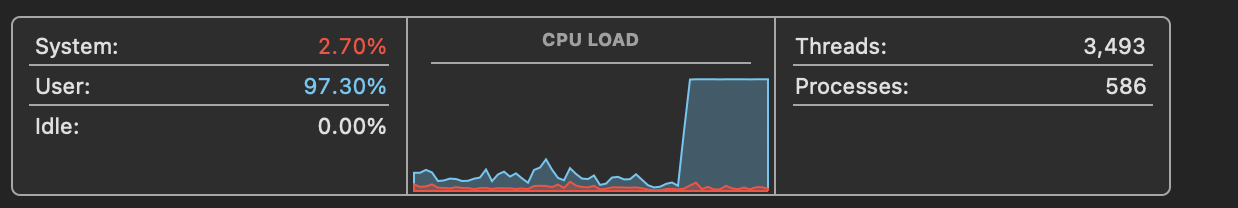

In [21]:
end - start

75.13431715965271

In [22]:
#Accuracy score
y_pred = gcv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9805555555555555

In [23]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
log_reg = LogisticRegression()
start = time.time()
rcv = RandomizedSearchCV(log_reg,param_grid, cv=5, scoring='accuracy')
rcv.fit(X_train, y_train)
end = time.time()
print(f"RandomizedSearchCV took {end - start} seconds")

/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV took 31.887760877609253 seconds


/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ankitpokhrel/Downloads/All_pro

In [25]:
end - start

31.887760877609253

In [26]:
#accuracy score
y_pred = rcv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9861111111111112

In [ ]:
#Bayesian Optimization CV [Run in Collab and wait for time]
from skopt import BayesSearchCV
log_reg = LogisticRegression()
start = time.time()
bocv = BayesSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
bocv.fit(X_train, y_train)
end = time.time()
print(f"BayesSearchCV took {end - start} seconds")